In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('Curve Fitting.csv')
df

,Average (s),Height (m),Trial 1,Trial 2,Trial 3,Trial 4,STDEV
0,0.000000,0.880,0.0000,0.0000,0.0000,0.0000,0.000000
1,0.141550,0.590,0.1581,0.1364,0.1246,0.1471,0.014359
2,0.184550,0.520,0.2002,0.1841,0.1800,0.1739,0.011244
3,0.231200,0.455,0.2407,0.2376,0.2246,0.2219,0.009332
4,0.246875,0.346,0.2642,0.2315,0.2500,0.2418,0.013809
5,0.234950,0.390,0.2378,0.2281,0.2482,0.2257,0.010266
6,0.283250,0.300,0.2940,0.2867,0.2796,0.2727,0.009167
7,0.298900,0.221,0.3860,0.2874,0.2631,0.2591,0.059398
8,0.270200,0.182,0.2591,0.2788,0.2909,0.2520,0.017860
9,0.318300,0.144,0.3274,0.3078,0.3350,0.3030,0.015341


# Matplotlib

In [18]:
x = np.array(df['Average (s)']).reshape(-1, 1)
y = np.array(df['Height (m)'])

In [4]:
coefficients = np.polyfit(x, y, 2)
polynomial = np.poly1d(coefficients)

y_fit = polynomial(x)

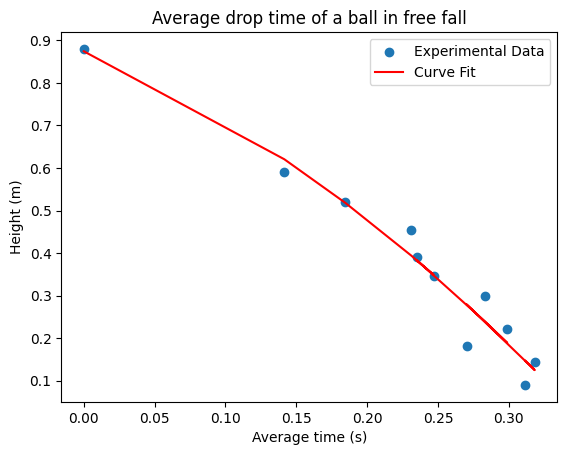

[-3.1773293  -1.34363714  0.874393  ]
        2
-3.177 x - 1.344 x + 0.8744


In [9]:
plt.scatter(x, y, label='Experimental Data')
plt.plot(x, y_fit, color='red', label='Curve Fit')
plt.title('Average drop time of a ball in free fall')
plt.ylabel('Height (m)')
plt.xlabel('Average time (s)')
plt.legend()
plt.show() 
print(coefficients)
print(polynomial)

In [21]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)

In [23]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [24]:
coefficients = model.coef_
intercept = model.intercept_
r_squared = model.score(X_poly, y)
y_pred = model.predict(X_poly)

In [26]:
print(f'Polynomial Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_squared}')
print(f'Predicted Values: {y_pred}')

Polynomial Coefficients: [ 0.         -1.34363714 -3.1773293 ]
Intercept: 0.8743929982989431
R-squared: 0.9574789589858089
Predicted Values: [0.874393   0.62053891 0.51820905 0.39390491 0.34903305 0.3833121
 0.23888886 0.18891341 0.27937166 0.12480253 0.14663252]


# Seaborn

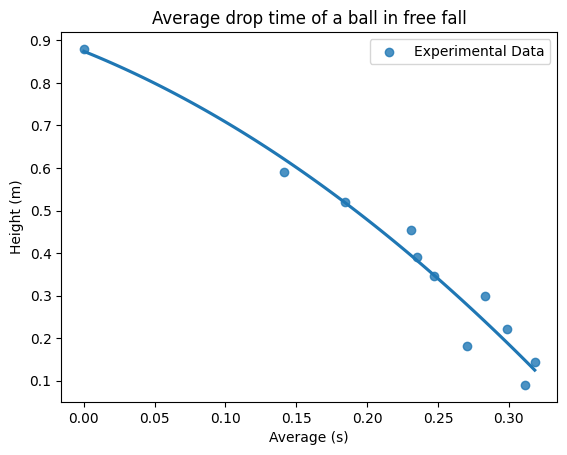

In [45]:
import seaborn as sns

sns.regplot(x='Average (s)', y='Height (m)', label='Experimental Data', data=df, order=2, ci=None)
plt.title('Average drop time of a ball in free fall')
plt.legend()
plt.show()